Alias Contour Plots (Figure 3) - RUN

- This code uses 'aliased_dataset/' and 'coherence_analysis.f' to determine regions where spatial and temporal aliasing can occur.

- The original DOA solutions and the addional DOA solutions due to aliasing are stored in the Z variable of each contour plot.

In [61]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import Counter

In [62]:
'Framing Ideal Data with .gnuplot extension'

def ideal_data_frame_gnu(files,maxpow):
    
    path = 'aliased_dataset/'
    output_folder = sorted(glob.glob("{}{}/*.gnuplot".format(path,files)))
    df_all_rows = pd.concat([pd.read_csv(item,header=None,delim_whitespace=True) for item in output_folder],axis = 0,ignore_index=True)

    df_maxpower = df_all_rows[df_all_rows[3] >= maxpow]
    df = df_maxpower.drop_duplicates(subset=[0], keep='first', inplace=False)
    
    input_azimuth_list = []
    input_elevation_list = []

    for i in df[0]:
        input_azimuth_list.append(float(i[9:13]))
        input_elevation_list.append(float(i[14:18]))
    
    input_azimuth = np.array(input_azimuth_list)
    input_elevation = np.array(input_elevation_list)
    power = df[3].to_numpy(dtype=float)
    output_azimuth_180 = df[4].to_numpy(dtype=float)
    output_azimuth_list = [angle + 360 if angle < 0 else angle for angle in output_azimuth_180]
    output_azimuth = np.array(output_azimuth_list)
    output_elevation = df[5].to_numpy(dtype=float)
    
    return(input_azimuth,input_elevation,power,output_azimuth,output_elevation)


In [63]:
'Framing Ideal Data with .txt extension'

def ideal_data_frame_txt(files,maxpow):
    
    path = 'aliased_dataset/'
    output_folder = sorted(glob.glob("{}{}/*.txt".format(path,files)))
    df_all_rows = pd.concat([pd.read_csv(item,header=None,delim_whitespace=True) for item in output_folder],axis = 0,ignore_index=True)
    
    df = df_all_rows[df_all_rows[3] >= maxpow]    
    input_azimuth_list = []
    input_elevation_list = []
    
    for full_path in output_folder:
        input_azimuth_list.append(int(full_path[33:36]))
        input_elevation_list.append(int(full_path[39:41]))
    
    input_azimuth = np.array(input_azimuth_list)
    input_elevation = np.array(input_elevation_list)
    power = df[3].to_numpy(dtype=float)
    output_azimuth_180 = df[4].to_numpy(dtype=float)
    output_azimuth_list = [angle + 360 if angle < 0 else angle for angle in output_azimuth_180]
    output_azimuth = np.array(output_azimuth_list)
    output_elevation = df[5].to_numpy(dtype=float)
    
    return(input_azimuth,input_elevation,power,output_azimuth,output_elevation)


In [64]:
def aliased_contour_plot(frequency,input_azimuth,input_elevation,string):
    
    output_azi1=np.linspace(0,360,37)
    output_ele2=np.linspace(0,90,19)
    cmap = 'terrain'
    
    fig, ax = plt.subplots(figsize=(17,4))
    X = np.reshape(input_azimuth,(181,41))
    Y = np.reshape(input_elevation,(181,41))
    Z_az = np.reshape(output_azimuth,(181,41))
    im = ax.contourf(X,Y,Z_az,vmin=0,vmax=360,levels=output_azi1,cmap=cmap)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Input Azimuth',fontsize=20)
    plt.ylabel('Input Elevation',fontsize=20)
    plt.title('Output Azimuth at {} MHz'.format(string),fontsize=25)
    cbar = plt.colorbar(im,ax = ax,aspect=10,pad=0.02)
    cbar.ax.tick_params(labelsize=14)
    plt.savefig('figures/figure3/alias_contour_plot_{}_MHz_azimuth.png'.format(frequency))
    plt.show()

    fig, ax = plt.subplots(figsize=(17,4))
    X = np.reshape(input_azimuth,(181,41))
    Y = np.reshape(input_elevation,(181,41))
    Z_el = np.reshape(output_elevation,(181,41))
    im = ax.contourf(X,Y,Z_el,vmin=0,vmax=90,levels=output_ele2,cmap=cmap)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Input Azimuth',fontsize=20)
    plt.ylabel('Input Elevation',fontsize=20)
    plt.title('Output Elevation at {} MHz'.format(string),fontsize=25)
    cbar = plt.colorbar(im,ax = ax,aspect=10,pad=0.02)
    cbar.ax.tick_params(labelsize=14)
    plt.savefig('figures/figure3/alias_contour_plot_{}_MHz_elevation.png'.format(frequency))
    plt.show()
    
    return(Z_az,Z_el)

'To Find Max Power of an Aliased Dataset:'

path = 'aliased_dataset/'
files = '5_4/files'
output_folder = sorted(glob.glob("{}{}/*.txt".format(path,files)))
df_all_rows = pd.concat([pd.read_csv(item,header=None,delim_whitespace=True) for item in output_folder],axis = 0,ignore_index=True)
power = df_all_rows[3].to_numpy()
maxpower = np.max(power)
print(maxpower)

In [65]:
'From aliased_dataset/'

string = ['2.80','3.90','4.10','4.30','5.25','5.40','5.80']
frequency_file = ['2_80','3_90','4_10','4_30','5_25','5_40','5_80']
maxpow = [779, 751, 779, 768, 770, 773, 741]
file_extension = ['.gnuplot','.txt','.txt','.gnuplot','.txt','.txt','.txt']

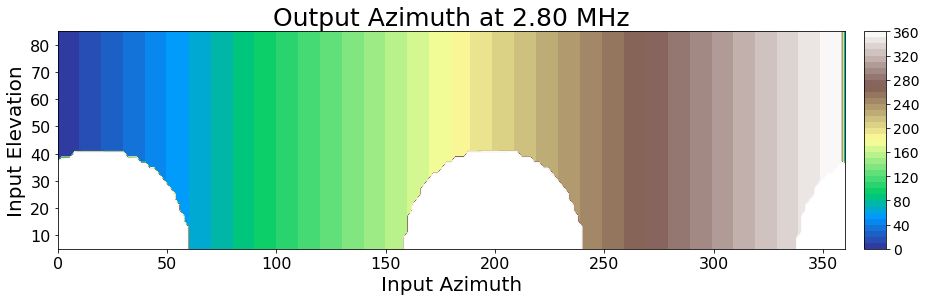

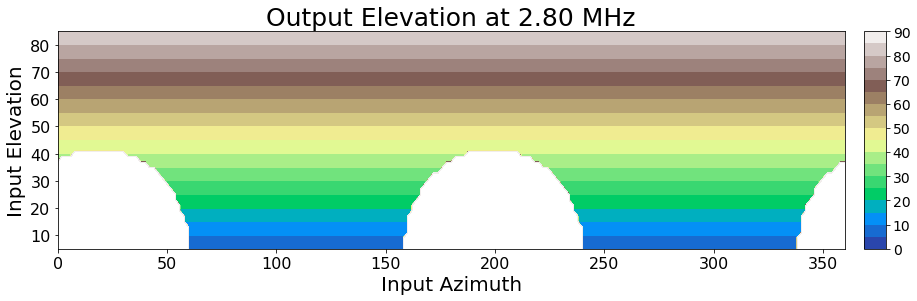

In [53]:
'2.80 MHz'

files = '{}_MHz/files'.format(frequency_file[0])

(input_azimuth,input_elevation,power,output_azimuth,output_elevation) = ideal_data_frame_gnu(files,maxpow[0])

(Z_az_2_80_MHz,Z_el_2_80_MHz) = aliased_contour_plot(frequency_file[0],input_azimuth,input_elevation,string[0])

'3.90 MHz'

files = '{}_MHz/files'.format(frequency_file[1])

(input_azimuth,input_elevation,power,output_azimuth,output_elevation) = ideal_data_frame_txt(files,maxpow[1])

(Z_az_3_90_MHz,Z_el_3_90_MHz) = aliased_contour_plot(frequency_file[1],input_azimuth,input_elevation,string[1])

'4.10 MHz'

files = '{}_MHz/files'.format(frequency_file[2])

(input_azimuth,input_elevation,power,output_azimuth,output_elevation) = ideal_data_frame_txt(files,maxpow[2])

(Z_az_4_10_MHz,Z_el_4_10_MHz) = aliased_contour_plot(frequency_file[2],input_azimuth,input_elevation,string[2])

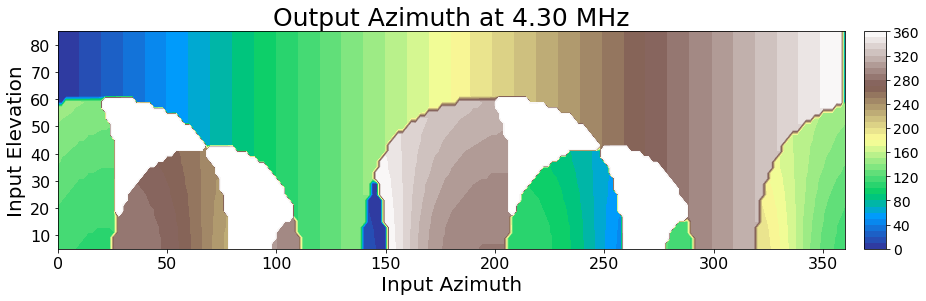

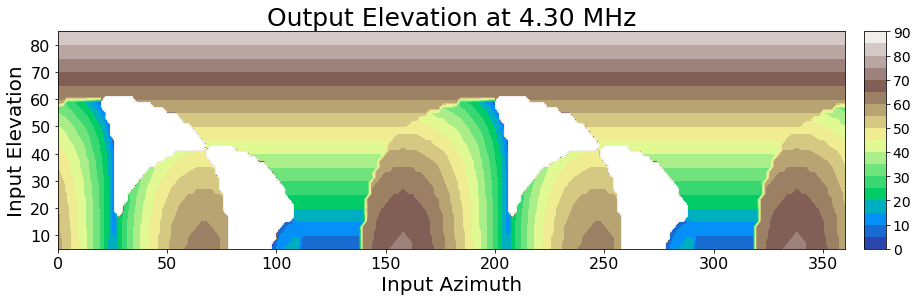

In [56]:
'4.30 MHz'

files = '{}_MHz/files'.format(frequency_file[3])

input_azimuth,input_elevation,power,output_azimuth,output_elevation = ideal_data_frame_gnu(files,maxpow[3])

(Z_az_4_30_MHz,Z_el_4_30_MHz) = aliased_contour_plot(frequency_file[3],input_azimuth,input_elevation,string[3])

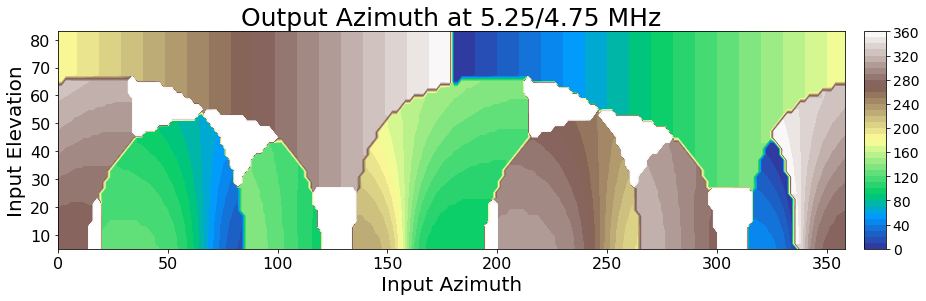

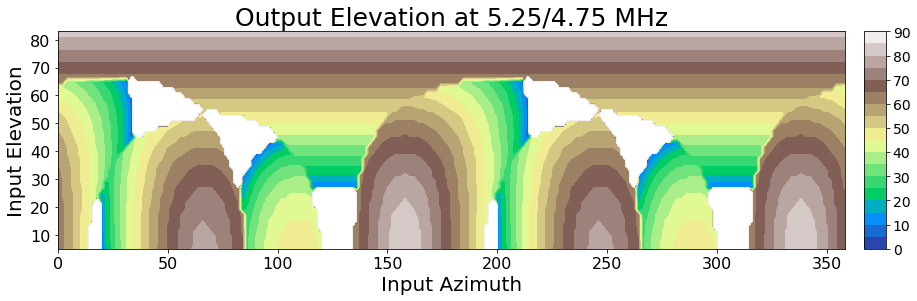

In [58]:
'5.25 MHz'

files = '{}_MHz/files'.format(frequency_file[4])

input_azimuth,input_elevation,power,output_azimuth,output_elevation = ideal_data_frame_txt(files,maxpow[4])

output_azi1=np.linspace(0,360,37)
output_ele2=np.linspace(0,90,19)
cmap = 'terrain'
    
fig, ax = plt.subplots(figsize=(17,4))
X = np.reshape(input_azimuth,(180,40))
Y = np.reshape(input_elevation,(180,40))
Z_az_5_25_MHz = np.reshape(output_azimuth,(180,40))
im = ax.contourf(X,Y,Z_az_5_25_MHz,vmin=0,vmax=360,levels=output_azi1,cmap=cmap)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Input Azimuth',fontsize=20)
plt.ylabel('Input Elevation',fontsize=20)
plt.title('Output Azimuth at 5.25/4.75 MHz',fontsize=25)
cbar = plt.colorbar(im,ax = ax,aspect=10,pad=0.02)
cbar.ax.tick_params(labelsize=14)
#plt.savefig('figures/figure3/alias_contour_plot_5_25_MHz_elevation.png.png')
plt.show()

fig, ax = plt.subplots(figsize=(17,4))
X = np.reshape(input_azimuth,(180,40))
Y = np.reshape(input_elevation,(180,40))
Z_el_5_25_MHz = np.reshape(output_elevation,(180,40))
im = ax.contourf(X,Y,Z_el_5_25_MHz,vmin=0,vmax=90,levels=output_ele2,cmap=cmap)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Input Azimuth',fontsize=20)
plt.ylabel('Input Elevation',fontsize=20)
plt.title('Output Elevation at 5.25/4.75 MHz',fontsize=25)
cbar = plt.colorbar(im,ax = ax,aspect=10,pad=0.02)
cbar.ax.tick_params(labelsize=14)
#plt.savefig('figures/figure3/alias_contour_plot_5_25_MHz_elevation.png.png')
plt.show()

'5.40 MHz'

files = '{}_MHz/files'.format(frequency_file[5])

input_azimuth,input_elevation,power,output_azimuth,output_elevation = ideal_data_frame_txt(files,maxpow[5])

(Z_az_5_40_MHz,Z_el_5_40_MHz) = aliased_contour_plot(frequency_file[4],input_azimuth,input_elevation,string[5])

'5.80 MHz'

files = '{}_MHz/files'.format(frequency_file[6])

input_azimuth,input_elevation,power,output_azimuth,output_elevation = ideal_data_frame_txt(files,maxpow[6])

(Z_az_5_80_MHz,Z_el_5_80_MHz) = aliased_contour_plot(frequency_file[4],input_azimuth,input_elevation,string[6])